<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
1. Описание данных *(с расчетом базовых статистик)*,
2. Исследование зависимостей и формулирование гипотез,
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей,
4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  recall_score, precision_score
from sklearn.model_selection import train_test_split

In [70]:
data = pd.read_csv('telecom_users.csv')

# 1. Описание данных

----------------------------

### 1.1 Загрузка и трансформация данных

In [71]:
target = ['Churn']
client_describe = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MonthlyCharges', 'TotalCharges', 'tenure']
client_services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [72]:
data.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [73]:
assert data['customerID'].value_counts().mean() == 1.0, 'Кто-то из клиентов повторяется!'

In [74]:
names = data['customerID'].values

In [75]:
# целевая переменная
data['Churn'] = np.where(data['Churn'] == 'Yes', 1,0)

# переменные Yes - 1 & No - 0
data['gender'] = np.where(data['gender'] == 'Male', 1,0)
data['Partner'] = np.where(data['Partner'] == 'Yes', 1,0)
data['Dependents'] = np.where(data['Dependents'] == 'Yes', 1,0)
data['PhoneService'] = np.where(data['Dependents'] == 'Yes', 1,0)
data['PaperlessBilling'] = np.where(data['PaperlessBilling'] == 'Yes', 1,0)


# переменные Yes - 1 & No - 0 & somethingelse -1
data['MultipleLines'] = np.where(data['MultipleLines'] == 'Yes', 1,
                                            (np.where(data['MultipleLines'] == 'No',0,-1)))
data['InternetService'] = np.where(data['InternetService'] == 'Fiber optic', 1,
                                            (np.where(data['InternetService'] == 'DSL',0,-1)))
data['OnlineSecurity'] = np.where(data['OnlineSecurity'] == 'Yes', 1,
                                            (np.where(data['OnlineSecurity'] == 'No',0,-1)))
data['OnlineBackup'] = np.where(data['OnlineBackup'] == 'Yes', 1,
                                            (np.where(data['OnlineBackup'] == 'No',0,-1)))
data['DeviceProtection'] = np.where(data['DeviceProtection'] == 'Yes', 1,
                                            (np.where(data['DeviceProtection'] == 'No',0,-1)))
data['TechSupport'] = np.where(data['TechSupport'] == 'Yes', 1,
                                            (np.where(data['TechSupport'] == 'No',0,-1)))
data['StreamingTV'] = np.where(data['StreamingTV'] == 'Yes', 1,
                                            (np.where(data['StreamingTV'] == 'No',0,-1)))
data['StreamingMovies'] = np.where(data['StreamingMovies'] == 'Yes', 1,
                                            (np.where(data['StreamingMovies'] == 'No',0,-1)))
data['Contract'] = np.where(data['Contract'] == 'Month-to-month', 1,
                                            (np.where(data['Contract'] == 'Two year',0,-1)))


# переменные с четырьмя вариантами

data['PaymentMethod'].loc[data['PaymentMethod'] == 'Electronic check'] = int(1)
data['PaymentMethod'].loc[data['PaymentMethod'] == 'Mailed check'] = int(2)
data['PaymentMethod'].loc[data['PaymentMethod'] == 'Bank transfer (automatic)'] = int(3)
data['PaymentMethod'].loc[data['PaymentMethod'] == 'Credit card (automatic)'] = int(4)

c:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [76]:
data['customerID'] = names

---------------------------------------------

### 1.2 смотрим на данные

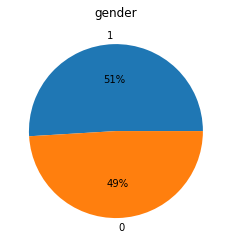

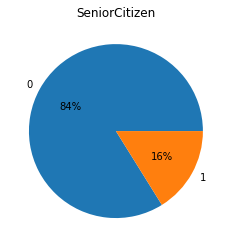

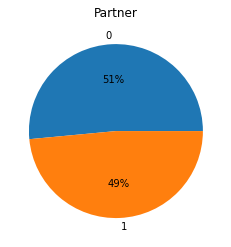

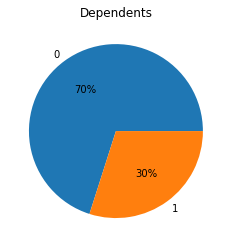

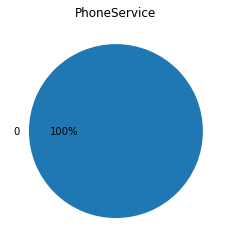

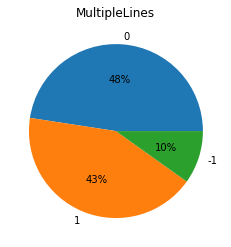

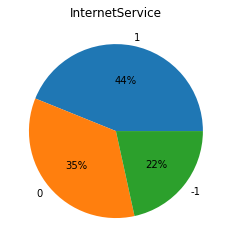

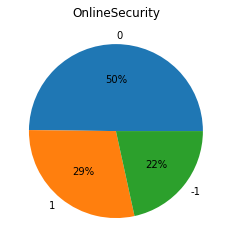

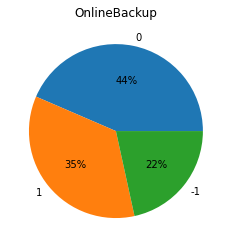

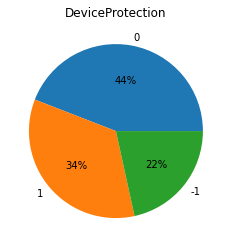

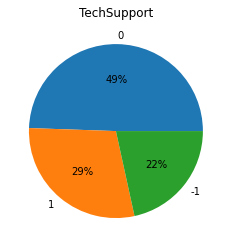

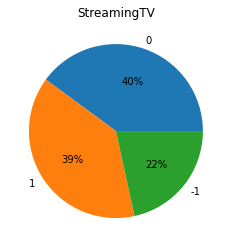

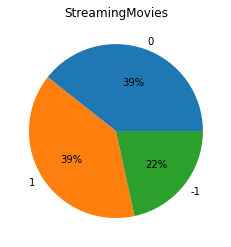

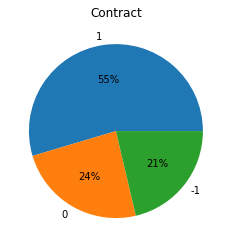

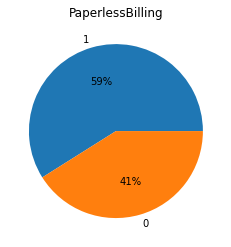

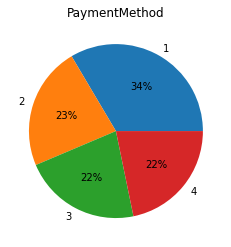

In [77]:
for feature in client_describe+client_services:
    #если у нас признак имеет до 4 значений, то строим круговую диаграмму
    if data[feature].value_counts().shape[0] < 5:
        plt.figure(figsize = (4,4))
        plt.pie(data[feature].value_counts(), labels= data[feature].value_counts().index, autopct='%1.0f%%')
        plt.title(feature)
        plt.show()

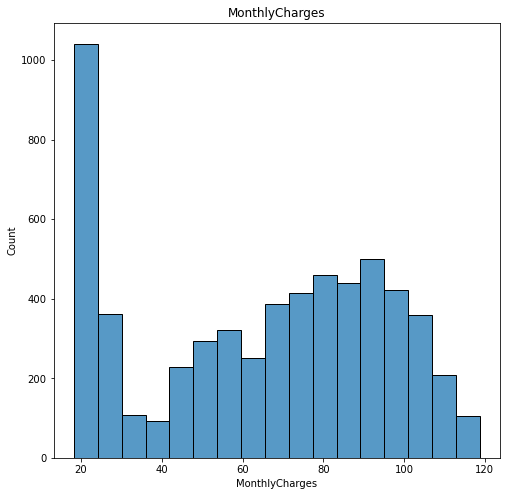

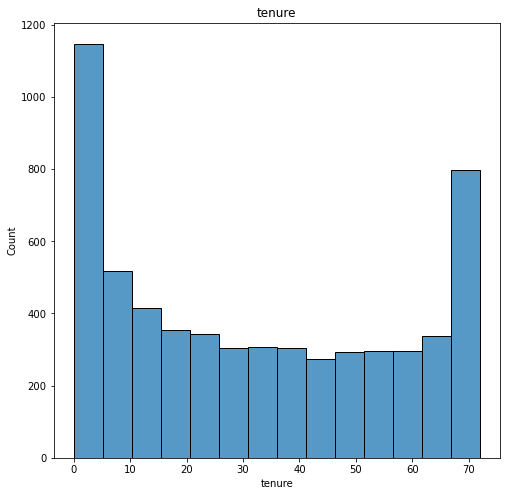

In [78]:
for feature in client_describe+client_services:
    #если у нас признак имеет более 4 значений, то строим гистограмму
    if data[feature].value_counts().shape[0] > 5 and data[feature].value_counts().shape[0]<2000:
        plt.figure(figsize = (8,8))
        sns.histplot(data[feature])
        plt.title(feature)
        plt.show()

---------------------------------------------

### 1.3 выделим группы  для -tenure --MonthlyCharges ---TotalCharges

возьмем целое от от деления на 10, 10 и 1000 соответственно, что позволит выделить группы

In [79]:
TotalCharges_list = []
exception = []
for n,one in enumerate(list(data['TotalCharges'].values)):
    try:
        TotalCharges_list.append(float(one))
    except:
        TotalCharges_list.append(0)
        exception.append(n)

In [80]:
data['TotalCharges'] = TotalCharges_list

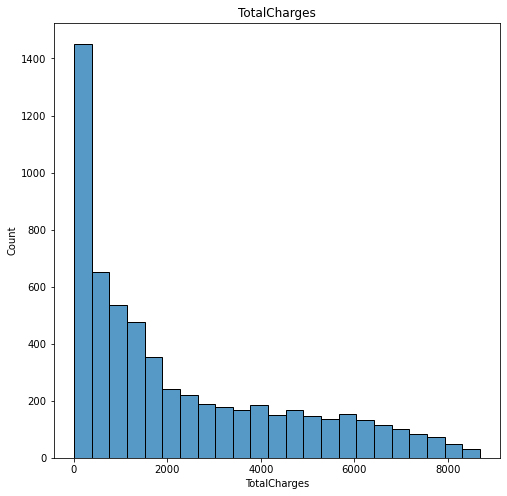

In [81]:
for feature in client_describe+client_services:
    #если у нас признак имеет более 4 значений, то строим гистограмму
    if data[feature].value_counts().shape[0] > 2000:
        plt.figure(figsize = (8,8))
        sns.histplot(data[feature])
        plt.title(feature)
        plt.show()

In [82]:
data['tenure']  = data['tenure']//10
data['MonthlyCharges']  = data['MonthlyCharges']//10
data['TotalCharges']  = data['TotalCharges']//1000

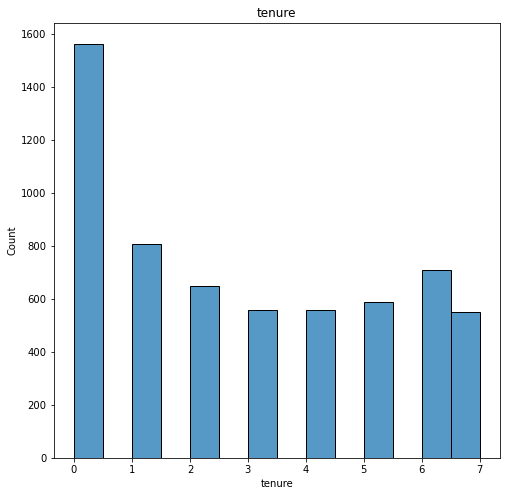

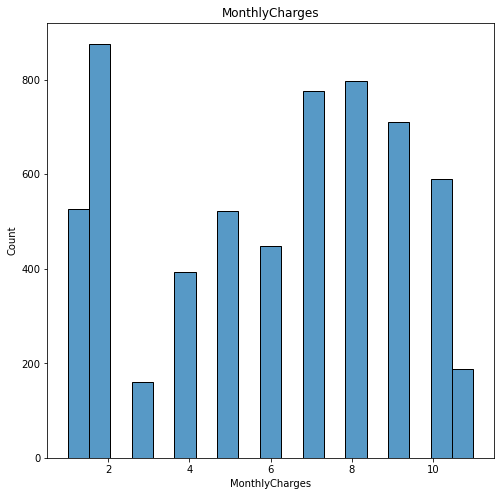

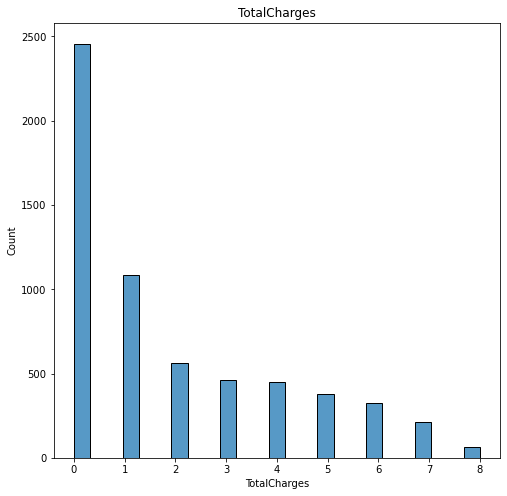

In [83]:
for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize = (8,8))
    sns.histplot(data[feature])
    plt.title(feature)
    plt.show()

----------------------------------------------------------------

# 2. Исследование зависимостей и формулирование гипотез

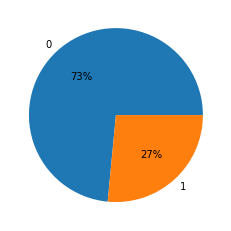

In [84]:
# общее распредление клиентов
plt.pie(data['Churn'].value_counts(), labels= data['Churn'].value_counts().index, autopct='%1.0f%%')
plt.show()

In [85]:
data['Churn'].value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

### **baseline** из 4 клиентов один клиент скорее всего будет менять оператора 

### 2.1 смотрит на данные агрегируем их по клиентам по которрым был отток Churn = 1 и клиенты которые остались Churn = 0

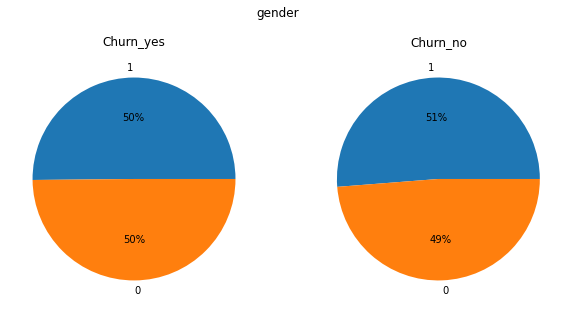

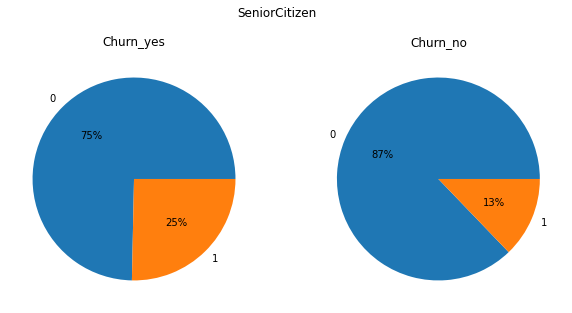

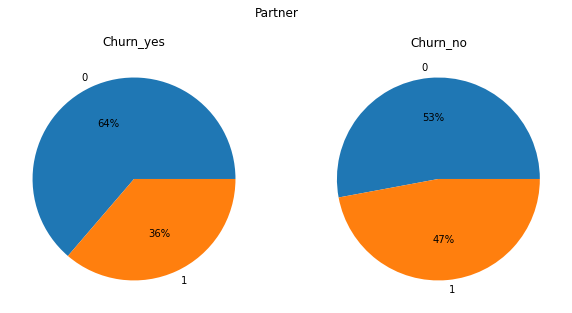

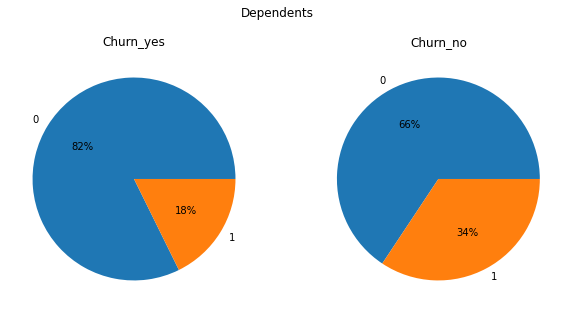

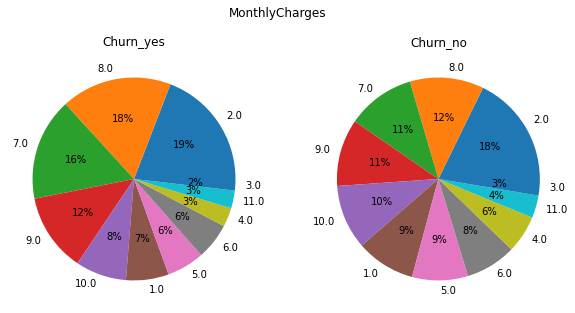

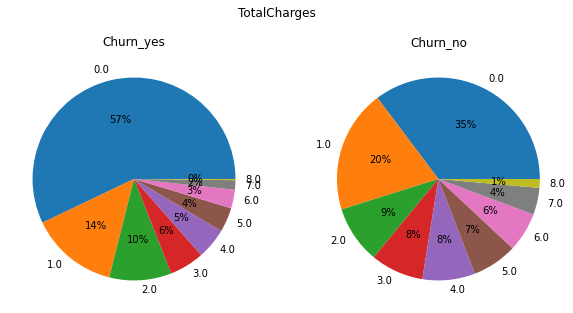

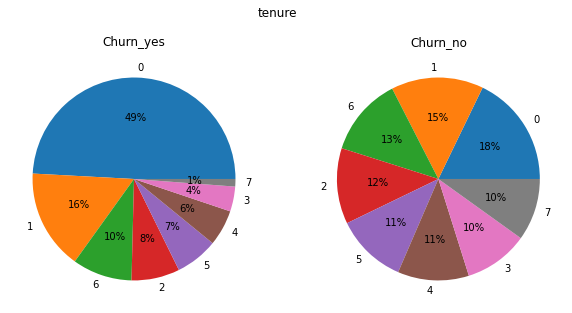

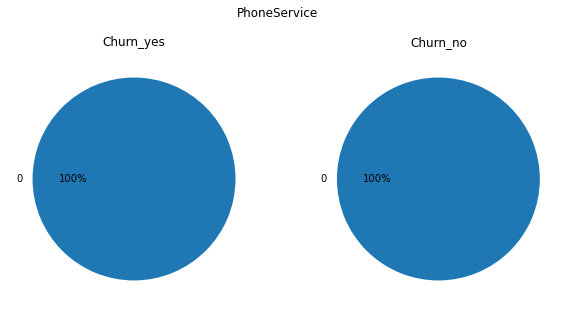

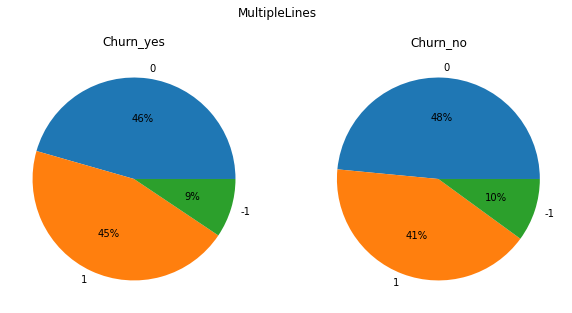

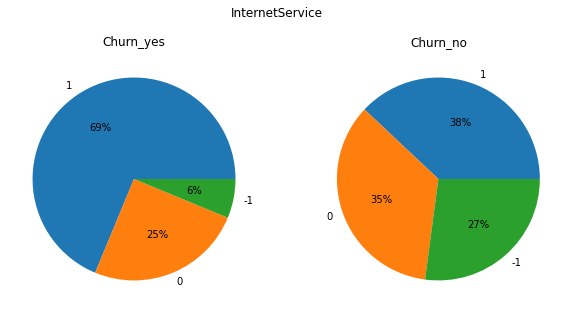

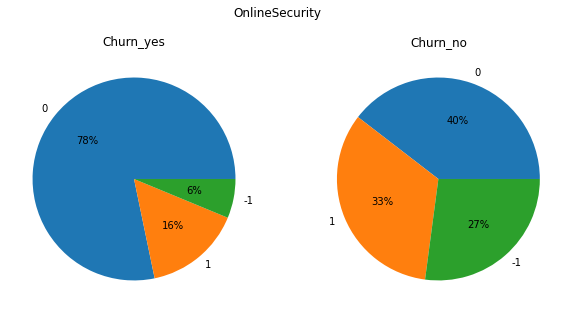

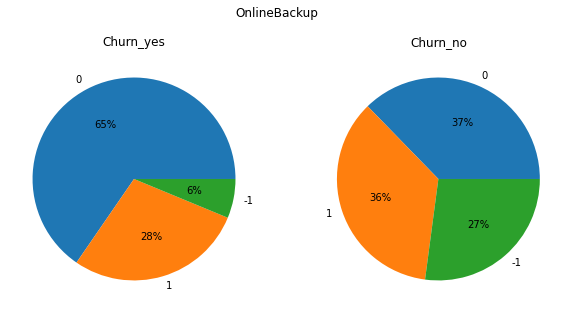

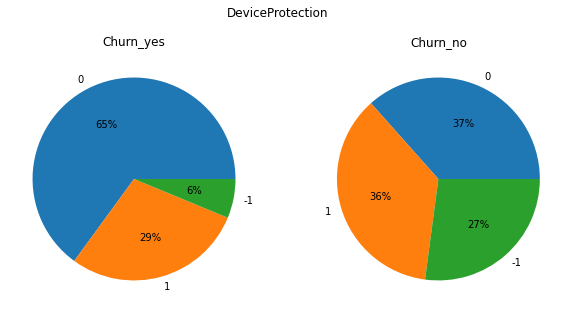

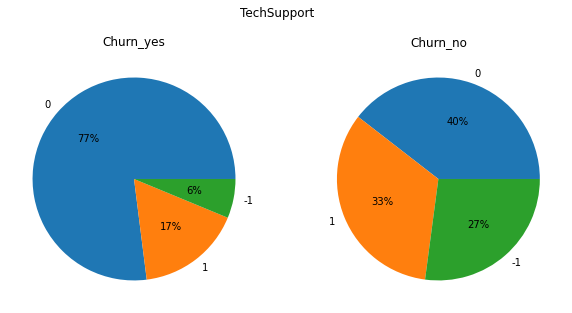

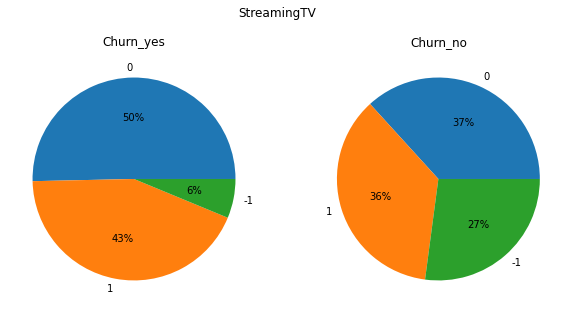

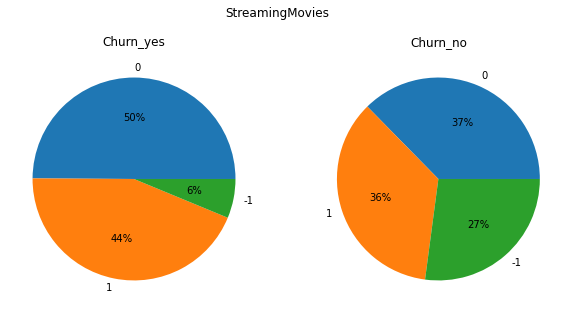

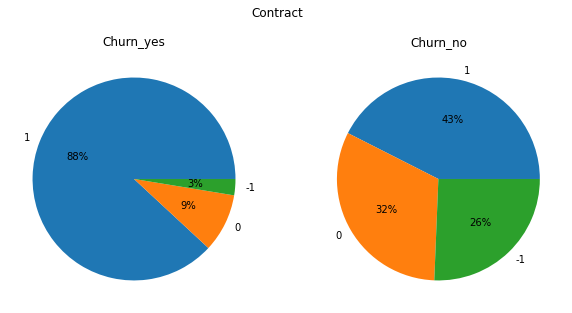

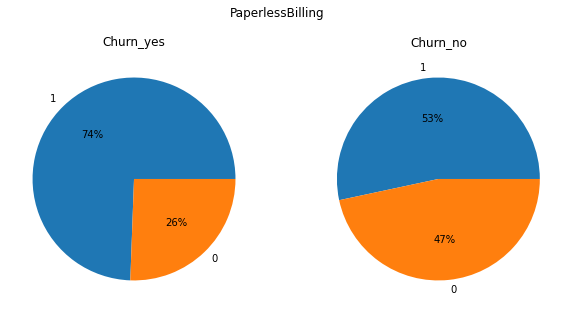

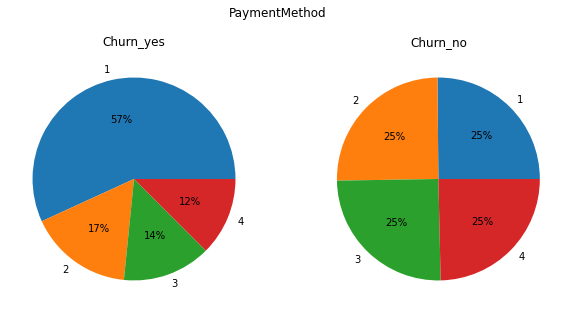

In [86]:
for feature in client_describe+client_services:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    #если у нас признак имеет до 4 значений, то строим круговую диаграмму
    #if data[feature].value_counts().shape[0] < 3:
        
    ax1.pie(data[feature][data['Churn'] == 1].value_counts(), labels= data[feature].value_counts().index, autopct='%1.0f%%')
    ax2.pie(data[feature][data['Churn'] == 0].value_counts(), labels= data[feature].value_counts().index, autopct='%1.0f%%')
    
    ax1.set_title('Churn_yes')
    ax2.set_title('Churn_no')

    fig.suptitle(feature)
    plt.show()



### 2.2 Гипотезы

Визуальная оцнека показывает, что такие признаки, как  'gender' и 'PhoneService' не имеют значительных различий для оценнки оттока.
Признаки StreamingTV и StreamingMovies очень похожие и для моделирования будет взят один признак.

In [87]:
features = client_describe+client_services
features.remove('gender')
features.remove('PhoneService')
features.remove('StreamingMovies')

**Гипотеза 1**

*tenure* общая продолжительность использования в месяцах влияет на отток, если продолжительность не большая (менее 10 месяцев), то уходит каждый второй клиент.
*Примечание: отток = 49% от 1587 -- , остались = 18% от 4389 .*



**Гипотеза 2**

*Contract* продолжительность контракта, чем короче контракт, тем больше вероятность оттока 42%. Что отчасти подтверждает гипотезу 1.
*Примечание: отток = 88% от 1587 -- , остались = 43% от 4389 .*



**Гипотеза 3**

*StreamingTV/StreamingMovies* с услугой стриминогового кино оттока выше, чем baseline и составляет 33%.
*Примечание: отток = 50% от 1587 -- , остались = 37% от 4389 .*


**Гипотеза 4**

*InternetService* почти 40% пользователей услуг интернета через Fiber optic могут уйти, при этом пользователи DSL уходят в два раза реже.
*Примечание: отток = 69% от 1587 -- , остались = 38% от 4389 .*

### 2.3 Оценка важности (величины группы в общей выборке) по гипотезам

In [88]:
dim_population = data.shape[0]

In [89]:
dim_tenure = data[data['tenure'] ==0].shape[0]
dim_contract = data[data['Contract'] ==0].shape[0]
dim_tv = data[data['StreamingTV'] ==0].shape[0]
dim_movie = data[data['StreamingMovies'] ==0].shape[0]
dim_fiber = data[data['InternetService'] ==1].shape[0]
print(dim_tenure, dim_contract, dim_tv, dim_movie, dim_fiber)

1564 1441 2389 2356 2627


In [90]:
print("Важность, чем выше значение, тем важнее!")
print("")
print('tenure', np.round(dim_tenure/dim_population,2))
print('Contract', np.round(dim_contract/dim_population,2))
print('StreamingTV', np.round(dim_tv/dim_population,2))
print('StreamingMovies', np.round(dim_movie/dim_population,2))
print('InternetService:Fiber optic', np.round(dim_fiber/dim_population,2))

Важность, чем выше значение, тем важнее!

tenure 0.26
Contract 0.24
StreamingTV 0.4
StreamingMovies 0.39
InternetService:Fiber optic 0.44


-----------------------------------------

# 3. Построение моделей для прогнозирования оттока

### 3.1 Разбиение данных

In [91]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data['Churn'],
                                                            test_size=0.2, random_state=42, shuffle=True)

### 3.2 Модели

будем смотреть модели классификации
- logistic regression
- random forest
- xgboost/catboost

In [92]:
def log_regression (data, features, target, model = True):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    result = {}

    x_train, x_test, y_train, y_test = train_test_split(data[features], data[target],
                                                            test_size=0.2, random_state=42, shuffle=True)

    model = LogisticRegression(random_state=42).fit(x_train, y_train)

    pred = model.predict(x_test)
    pred_all = model.predict(data[features])
    
    result={'logistic': [recall_score(pred, y_test),precision_score(pred, y_test)]}

    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    if model:
        return model, result
    else:
        return result


In [93]:
def rf_classificator(data, features, target, model = True):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    """ функция делает модельку по выбранным признакам и целевой переменной"""
    max_depth = len(features)-1
       

    x_train, x_test, y_train, y_test = train_test_split(data[features], data[target],
                                                            test_size=0.2, random_state=42, shuffle=True)
                                                            
    model = RandomForestClassifier(n_estimators = 100, max_depth=max_depth, random_state=42).fit(x_train, y_train)

    pred = model.predict(x_test)
    pred_all = model.predict(data[features])

    result={'rf': [recall_score(pred, y_test),precision_score(pred, y_test)]}   

    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    if model:
        return model, result
    else:
        return result

In [94]:
def xgb_classificator(data, features, target, model = True):
    from xgboost import XGBClassifier   
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
     
    x_train, x_test, y_train, y_test = train_test_split(data[features], data[target],
                                                            test_size=0.2, random_state=42, shuffle=True)

    model = XGBClassifier().fit(x_train.values, y_train.values)

    pred = model.predict(x_test.values)
    pred_all = model.predict(data[features].values)

    result={'xgb': [recall_score(pred, y_test.values),precision_score(pred, y_test.values)]}   

    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    if model:
        return model, result
    else:
        return result

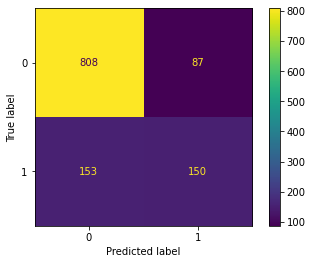

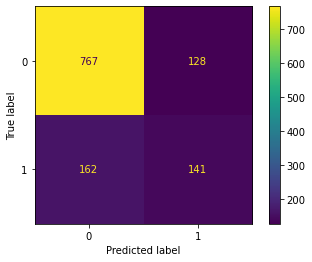

In [95]:
logis, log_result = log_regression(data, features, target = 'Churn')
rf, rf_result = rf_classificator(data, features, target = 'Churn')


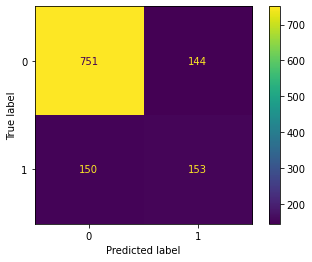

In [96]:
xgb, xgb_result = xgb_classificator(data, features, target = 'Churn')

### 3.3 Анализ метрик

In [97]:
log_result.update(xgb_result)
log_result.update(rf_result)

In [98]:
result=pd.DataFrame(log_result, index = ['recall','precision'])
result = np.round(result, 2)

In [99]:
result

,logistic,xgb,rf
recall,0.63,0.52,0.52
precision,0.50,0.50,0.47


    **precision** - показывает сколько мы зацепили из другого класса
    **recall** - сколько из текущего класса мы смогли охватить

Исходя из задачи определение "оттока" , то можно предположить, что функция recall является приоритетной.

### 3.4 Анализ признаков для лучшей модели (логистической реегрессии)

In [100]:
df = pd.DataFrame(logis.coef_.reshape(-1,1), index = logis.feature_names_in_, columns=['importance'])

In [101]:
df_ = df.copy() #понадобиться потом для анализа

In [102]:
df = np.abs(df)
df.sort_values('importance', ascending=False, inplace=True)


In [103]:
threshold = 0.25

In [104]:
best_features = df[df>threshold].dropna().index

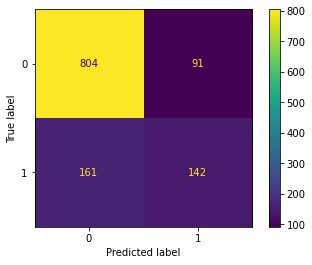

In [105]:
logis_b, log_result_b = log_regression(data, best_features, target = 'Churn')

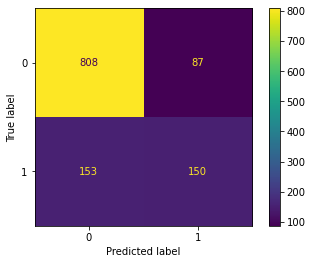

In [106]:
logis, log_result = log_regression(data, features, target = 'Churn')

In [107]:
log_result.update(rf_result)
log_result.update(xgb_result)

In [108]:
log_result

{'logistic': [0.6329113924050633, 0.49504950495049505],
 'rf': [0.5241635687732342, 0.46534653465346537],
 'xgb': [0.5151515151515151, 0.504950495049505]}

In [109]:
result=pd.DataFrame(log_result, index = ['recall','precision'])
result = np.round(result, 2)

In [110]:
result['short_logistic'] = np.round(log_result_b['logistic'],2)

In [111]:
result

,logistic,rf,xgb,short_logistic
recall,0.63,0.52,0.52,0.61
precision,0.50,0.47,0.50,0.47


In [112]:
list(best_features.values)

['InternetService',
 'StreamingTV',
 'tenure',
 'PaperlessBilling',
 'Contract',
 'OnlineSecurity',
 'TechSupport']

In [113]:
df_.loc[list(best_features.values)]

,importance
InternetService,1.225866
StreamingTV,0.575050
tenure,-0.526536
PaperlessBilling,0.397427
Contract,0.392364
OnlineSecurity,-0.337047
TechSupport,-0.309999


-----------------------------------------------

# 4. Сравнение качества моделей

Ниалучшим образом себя показала модель логистической регрессии. Модель позволяет предсказывать 63% клиентов, которые могут отказаться от услуг.
При этом наиболее важными являются характеристики

    'InternetService',
    'StreamingTV',
    'tenure',
    'PaperlessBilling',
    'Contract',
    'OnlineSecurity',
    'TechSupport'

Для снижения значения оттока необходимо
    - увеличивать показатель tenure, TechSupport,OnlineSecurity,
    - снижать (делать доступнее, например снижать стоимость или делать гибкие услуги) InternetService, StreamingTV, PaperlessBilling, Contract

С учетом сформулированных гипотез, необходимо клиентов пришедших в компанию до 1 года удерживать их маркетиновыми компаниями, переводить их на годичные контракты и не предлагать стриминовые сервис ТВ/Кино.

Проверить качество стримингово сервиса ТВ/Кино, сделать исследвоание по отношению к внутренним сервисам, а также сравнение с конкурентами. Данное исследование позволит сформировать шорт лист задач по изменению данного сервиса.

Также можно рекомендовать улучшение сервиса по передаче интеренета через Fiber optic (снижение стоимости, увеличения скорости и т.п.).